## Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()      ## % of nan values in each feature.

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [30]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [31]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [33]:
median = df.Age.median()
median

28.0

In [34]:
#Creating a function

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)      # it will add a new column and fill the nan values with median
    df[variable+"_random"]=df[variable]                     # it will create a new feature
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [36]:
impute_nan(df,'Age',median)

In [38]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

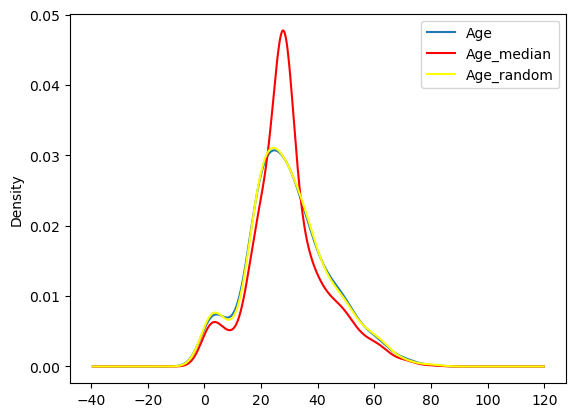

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)                       # plotting the real age distribution
df.Age_median.plot(kind='kde', ax=ax, color='red')      # plotting the median_age distribution 
df.Age_random.plot(kind='kde', ax=ax, color='yellow')   # plotting the random_age distribution
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Conclusion :- Age_random is looks like Age distribution but the Age_median which we saw in the previous (mean\median\mode impution ) that had some distortions.

#### Advantages
1. Easy To implement
2. There is less distortion in variance

#### Disadvantage

1. Every situation randomness wont work
